# Comparación de resultados: Netlogo vs Python

- Comparamos los resultados para cada protocolo de revisión.
- En cada protocolo:
    - Comparamos simulaciones con 1000, 100 y 50 agentes en modo asynchronous-random-independent.
    - Comparamos simulaciones con 1000 agentes y all-in-one-tick.
    - Comparamos con la mean dynamics.

In [1]:
import pandas as pd
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint
%matplotlib inline

# Mean dynamics

$$\dot{x} = p - q$$

- $p$: 
    - Probabilidad de que revise un jugador con estrategia no óptima: (1-x) 
    - Probabilidad de que al probar la óptima caiga con un jugador con la óptima: x
    - $\frac{1}{n}$ por la probabilidad de que en todas las pruebas obtenga 0: x(1-x)
$$p = (1-x)\left[x + \frac{x(1-x)}{n}\right]$$
- $q$: 
    - Probabilidad de que revise un jugador con estrategia óptima: x 
    - Probabilidad de que al probar la óptima obtenga 0 y al probar otra tenga algún pago: $(1-x)^2$
    - $\frac{n-1}{n}$ por la probabilidad de que en todas las pruebas obtenga 0: x(1-x)
$$q = x\left[(1-x)^2 + \frac{x(1-x)(n-1)}{n}\right]$$
$$\dot{x} = (1-x)\left[x + \frac{x(1-x)}{2}\right] - x\left[(1-x)^2 + \frac{x(1-x)}{2}\right]$$

$$\dot{x} = (1-x)x\left[1 + \frac{(1-x)}{2}\right] - x(1-x)\left[(1-x) + \frac{x}{2}\right]$$

$$\dot{x} = (1-x)x\left[1 + \frac{(1-x)}{2} - (1-x) - \frac{x}{2}\right]$$

$$\dot{x} = (1-x)x\left[\frac{1}{2} -\frac{x}{2} + x - \frac{x}{2}\right] = \frac{(1-x)x}{2}$$

In [2]:
def mean_dynamics(x, t):
    return (1 - x) * x / 2

In [3]:
t = np.linspace(0, 50, 51)
initial_proportion_optimal_strategists = 0.1

In [4]:
mean_dynamics_integration = odeint(mean_dynamics, initial_proportion_optimal_strategists, t)

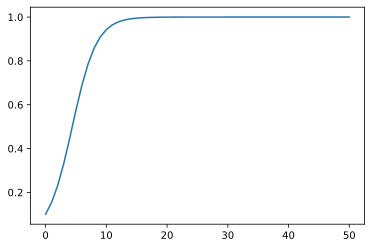

In [5]:
plt.plot(mean_dynamics_integration, label="MD")

# Networks

In [2]:
n_of_agents = 1000
probability_of_edge = 0.2
number_of_links = probability_of_edge * n_of_agents * (n_of_agents - 1) * 50
# binomial_graph(n_of_agents, probability_of_edge)
# barabasi_albert_graph(n_of_agents, number_of_links)
# connected_watts_strogatz_graph(self.n_of_agents, k, p)

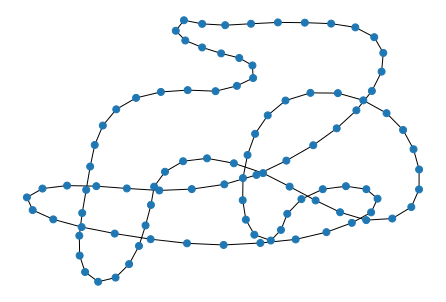

In [15]:
from networkx.generators.random_graphs import binomial_graph, barabasi_albert_graph, connected_watts_strogatz_graph
from networkx.generators.geometric import navigable_small_world_graph
import matplotlib.pyplot as plt
import networkx as nx

ring = connected_watts_strogatz_graph(100, k=2, p=0)
nx.draw(ring, node_size=50)
# nx.draw_circular(ring,  node_size=30)
plt.show()

In [18]:
list(ring.neighbors(0))

[1, 99]

# 1000 agentes 

## Netlogo

## Python